# 1 - Listado de variables y selección

## Entrada
* Manufacturer: Marca / fabricante del equipo
* Model Name: Nombre / número de modelo del equipo
* Category: Tipo de notebook
* Screen Size: Tamaño diagonal de la pantalla en pulgadas
* Screen Type: Resolución y tipo de panel
* CPU: Modelo de procesador
* RAM: Capacidad de memoria
* Storage: Tipo y tamaño de almacenamiento interno
* GPU: Tipo y modelo de procesador de gráficos
* OS: Sistema operativo
* Weight: Peso

## Salida
* Price: Será reducida con rangos a valores "bajo", "medio" o "alto"

## No utilizadas
* OS Version: No usada debido a su gran cantidad de nulos y presunta poca importancia

# 2 - Análisis detallado de un conjunto de variables


In [1]:
import pandas as pd

In [2]:
laptops_train = pd.read_csv('laptops_train.csv')
laptops_test = pd.read_csv('laptops_test.csv')

In [3]:
print("Entries de train: "+str(len(laptops_train)))
print("Entries de test: "+str(len(laptops_test)))

Entries de train: 977
Entries de test: 325


In [4]:
laptops_train.isnull().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
 Storage                      0
GPU                           0
Operating System              0
Operating System Version    136
Weight                        0
Price                         0
dtype: int64

In [5]:
laptops_test.isnull().sum()

Manufacturer                 0
Model Name                   0
Category                     0
Screen Size                  0
Screen                       0
CPU                          0
RAM                          0
 Storage                     0
GPU                          0
Operating System             0
Operating System Version    34
Weight                       0
Price                        0
dtype: int64

In [6]:
laptops_train

Manufacturer       Model Name   Category Screen Size  \
0          Apple      MacBook Pro  Ultrabook       13.3"   
1          Apple      Macbook Air  Ultrabook       13.3"   
2             HP           250 G6   Notebook       15.6"   
3          Apple      MacBook Pro  Ultrabook       15.4"   
4          Apple      MacBook Pro  Ultrabook       13.3"   
..           ...              ...        ...         ...   
972         Dell     Alienware 17     Gaming       17.3"   
973      Toshiba  Tecra A40-C-1DF   Notebook       14.0"   
974         Asus        Rog Strix     Gaming       17.3"   
975           HP      Probook 450   Notebook       15.6"   
976       Lenovo    ThinkPad T460   Notebook       14.0"   

                                 Screen                          CPU   RAM  \
0    IPS Panel Retina Display 2560x1600         Intel Core i5 2.3GHz   8GB   
1                              1440x900         Intel Core i5 1.8GHz   8GB   
2                     Full HD 1920x1080   Intel Core i5 7200U 2.5GHz   8GB   
3    IPS Panel Retina Display 2880x1800         Intel Core i7 2.7GHz  16GB   
4    IPS Panel Retina Display 2560x1600         Intel Core i5 3.1GHz   8GB   
..                                  ...                          ...   ...   
972                   Full HD 1920x1080  Intel Core i7 6700HQ 2.6GHz  32GB   
973                   Full HD 1920x1080   Intel Core i5 6200U 2.3GHz   8GB   
974                   Full HD 1920x1080  Intel Core i7 7700HQ 2.8GHz  16GB   
975         IPS Panel Full HD 1920x1080  Intel Core i5 7200U 2.70GHz   8GB   
976                            1366x768   Intel Core i5 6200U 2.3GHz   4GB   

                  Storage                           GPU Operating System  \
0               128GB SSD  Intel Iris Plus Graphics 640            macOS   
1     128GB Flash Storage        Intel HD Graphics 6000            macOS   
2               256GB SSD         Intel HD Graphics 620            No OS   
3               512GB SSD            AMD Radeon Pro 455            macOS   
4               256GB SSD  Intel Iris Plus Graphics 650            macOS   
..                    ...                           ...              ...   
972  256GB SSD +  1TB HDD       Nvidia GeForce GTX 1070          Windows   
973             256GB SSD         Intel HD Graphics 520          Windows   
974  256GB SSD +  1TB HDD       Nvidia GeForce GTX 1060          Windows   
975  128GB SSD +  1TB HDD          Nvidia GeForce 930MX          Windows   
976          508GB Hybrid         Intel HD Graphics 520          Windows   

    Operating System Version  Weight        Price  
0                        NaN  1.37kg  11912523.48  
1                        NaN  1.34kg   7993374.48  
2                        NaN  1.86kg   5112900.00  
3                        NaN  1.83kg  22563005.40  
4                        NaN  1.37kg  16037611.20  
..                       ...     ...          ...  
972                       10  4.42kg  24897600.00  
973                       10  1.95kg  10492560.00  
974                       10  2.73kg  18227710.80  
975                       10  2.04kg   8705268.00  
976                        7  1.70kg   8909784.00  

[977 rows x 13 columns]

In [7]:
# Renombre de las series
new_col_names = {
    "Manufacturer":"manufacturer",
    "Model Name":"model",
    "Category":"category",
    "Screen Size":"screen_size",
    "Screen":"resolution",
    "CPU":"cpu",
    "RAM":"ram",
    " Storage":"storage", # la string original tiene el espacio, sin eso no lo cambia
    "GPU":"gpu",
    "Operating System":"os",
    #"Operating System Version":"os_version",
    "Weight":"weight",
    "Price":"price"
}

laptops_train = laptops_train.rename(columns=new_col_names).drop(columns="Operating System Version")
laptops_test = laptops_test.rename(columns=new_col_names).drop(columns="Operating System Version")

In [8]:
laptops_train

manufacturer            model   category screen_size  \
0          Apple      MacBook Pro  Ultrabook       13.3"   
1          Apple      Macbook Air  Ultrabook       13.3"   
2             HP           250 G6   Notebook       15.6"   
3          Apple      MacBook Pro  Ultrabook       15.4"   
4          Apple      MacBook Pro  Ultrabook       13.3"   
..           ...              ...        ...         ...   
972         Dell     Alienware 17     Gaming       17.3"   
973      Toshiba  Tecra A40-C-1DF   Notebook       14.0"   
974         Asus        Rog Strix     Gaming       17.3"   
975           HP      Probook 450   Notebook       15.6"   
976       Lenovo    ThinkPad T460   Notebook       14.0"   

                             resolution                          cpu   ram  \
0    IPS Panel Retina Display 2560x1600         Intel Core i5 2.3GHz   8GB   
1                              1440x900         Intel Core i5 1.8GHz   8GB   
2                     Full HD 1920x1080   Intel Core i5 7200U 2.5GHz   8GB   
3    IPS Panel Retina Display 2880x1800         Intel Core i7 2.7GHz  16GB   
4    IPS Panel Retina Display 2560x1600         Intel Core i5 3.1GHz   8GB   
..                                  ...                          ...   ...   
972                   Full HD 1920x1080  Intel Core i7 6700HQ 2.6GHz  32GB   
973                   Full HD 1920x1080   Intel Core i5 6200U 2.3GHz   8GB   
974                   Full HD 1920x1080  Intel Core i7 7700HQ 2.8GHz  16GB   
975         IPS Panel Full HD 1920x1080  Intel Core i5 7200U 2.70GHz   8GB   
976                            1366x768   Intel Core i5 6200U 2.3GHz   4GB   

                  storage                           gpu       os  weight  \
0               128GB SSD  Intel Iris Plus Graphics 640    macOS  1.37kg   
1     128GB Flash Storage        Intel HD Graphics 6000    macOS  1.34kg   
2               256GB SSD         Intel HD Graphics 620    No OS  1.86kg   
3               512GB SSD            AMD Radeon Pro 455    macOS  1.83kg   
4               256GB SSD  Intel Iris Plus Graphics 650    macOS  1.37kg   
..                    ...                           ...      ...     ...   
972  256GB SSD +  1TB HDD       Nvidia GeForce GTX 1070  Windows  4.42kg   
973             256GB SSD         Intel HD Graphics 520  Windows  1.95kg   
974  256GB SSD +  1TB HDD       Nvidia GeForce GTX 1060  Windows  2.73kg   
975  128GB SSD +  1TB HDD          Nvidia GeForce 930MX  Windows  2.04kg   
976          508GB Hybrid         Intel HD Graphics 520  Windows  1.70kg   

           price  
0    11912523.48  
1     7993374.48  
2     5112900.00  
3    22563005.40  
4    16037611.20  
..           ...  
972  24897600.00  
973  10492560.00  
974  18227710.80  
975   8705268.00  
976   8909784.00  

[977 rows x 12 columns]

In [9]:
# Conversión de la variable de salida de rupias a dólares, tomando como base la cotización del 28/03/2023, según la última actualización del dataset
# Se dividió por 100 el valor obtenido debido a que los precios convertidos con la cotización de referencia se encontraban fuera del rango esperado
# Cotización: 1 INR = 0.0001217 USD


cotizacion = 0.0001217

def convertir_precio(precio):
    return int(precio * cotizacion)

laptops_train["price"] = laptops_train["price"].apply(convertir_precio)
laptops_test["price"] = laptops_test["price"].apply(convertir_precio)

In [10]:
laptops_train

manufacturer            model   category screen_size  \
0          Apple      MacBook Pro  Ultrabook       13.3"   
1          Apple      Macbook Air  Ultrabook       13.3"   
2             HP           250 G6   Notebook       15.6"   
3          Apple      MacBook Pro  Ultrabook       15.4"   
4          Apple      MacBook Pro  Ultrabook       13.3"   
..           ...              ...        ...         ...   
972         Dell     Alienware 17     Gaming       17.3"   
973      Toshiba  Tecra A40-C-1DF   Notebook       14.0"   
974         Asus        Rog Strix     Gaming       17.3"   
975           HP      Probook 450   Notebook       15.6"   
976       Lenovo    ThinkPad T460   Notebook       14.0"   

                             resolution                          cpu   ram  \
0    IPS Panel Retina Display 2560x1600         Intel Core i5 2.3GHz   8GB   
1                              1440x900         Intel Core i5 1.8GHz   8GB   
2                     Full HD 1920x1080   Intel Core i5 7200U 2.5GHz   8GB   
3    IPS Panel Retina Display 2880x1800         Intel Core i7 2.7GHz  16GB   
4    IPS Panel Retina Display 2560x1600         Intel Core i5 3.1GHz   8GB   
..                                  ...                          ...   ...   
972                   Full HD 1920x1080  Intel Core i7 6700HQ 2.6GHz  32GB   
973                   Full HD 1920x1080   Intel Core i5 6200U 2.3GHz   8GB   
974                   Full HD 1920x1080  Intel Core i7 7700HQ 2.8GHz  16GB   
975         IPS Panel Full HD 1920x1080  Intel Core i5 7200U 2.70GHz   8GB   
976                            1366x768   Intel Core i5 6200U 2.3GHz   4GB   

                  storage                           gpu       os  weight  \
0               128GB SSD  Intel Iris Plus Graphics 640    macOS  1.37kg   
1     128GB Flash Storage        Intel HD Graphics 6000    macOS  1.34kg   
2               256GB SSD         Intel HD Graphics 620    No OS  1.86kg   
3               512GB SSD            AMD Radeon Pro 455    macOS  1.83kg   
4               256GB SSD  Intel Iris Plus Graphics 650    macOS  1.37kg   
..                    ...                           ...      ...     ...   
972  256GB SSD +  1TB HDD       Nvidia GeForce GTX 1070  Windows  4.42kg   
973             256GB SSD         Intel HD Graphics 520  Windows  1.95kg   
974  256GB SSD +  1TB HDD       Nvidia GeForce GTX 1060  Windows  2.73kg   
975  128GB SSD +  1TB HDD          Nvidia GeForce 930MX  Windows  2.04kg   
976          508GB Hybrid         Intel HD Graphics 520  Windows  1.70kg   

     price  
0     1449  
1      972  
2      622  
3     2745  
4     1951  
..     ...  
972   3030  
973   1276  
974   2218  
975   1059  
976   1084  

[977 rows x 12 columns]

In [11]:
laptops_test

manufacturer                                model            category  \
0             HP    15-bs053od (i7-7500U/6GB/1TB/W10)            Notebook   
1           Asus                     Rog GL753VE-DS74              Gaming   
2           Dell                        Inspiron 7579  2 in 1 Convertible   
3        Toshiba                    Portege Z30-C-1CV            Notebook   
4         Lenovo                    IdeaPad 320-15ABR            Notebook   
..           ...                                  ...                 ...   
320       Lenovo                       Yoga 500-14ISK  2 in 1 Convertible   
321       Lenovo                       Yoga 900-13ISK  2 in 1 Convertible   
322       Lenovo                   IdeaPad 100S-14IBR            Notebook   
323           HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook   
324         Asus  X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook   

    screen_size                                  resolution  \
0         15.6"                                    1366x768   
1         17.3"                           Full HD 1920x1080   
2         15.6"   IPS Panel Full HD / Touchscreen 1920x1080   
3         13.3"                           Full HD 1920x1080   
4         15.6"                           Full HD 1920x1080   
..          ...                                         ...   
320       14.0"   IPS Panel Full HD / Touchscreen 1920x1080   
321       13.3"  IPS Panel Quad HD+ / Touchscreen 3200x1800   
322       14.0"                                    1366x768   
323       15.6"                                    1366x768   
324       15.6"                                    1366x768   

                                      cpu   ram               storage  \
0              Intel Core i7 7500U 2.7GHz   6GB               1TB HDD   
1             Intel Core i7 7700HQ 2.8GHz  16GB  256GB SSD +  1TB HDD   
2              Intel Core i7 7500U 2.7GHz  12GB             512GB SSD   
3              Intel Core i5 6200U 2.3GHz   4GB             128GB SSD   
4             AMD A12-Series 9720P 3.6GHz   6GB             256GB SSD   
..                                    ...   ...                   ...   
320            Intel Core i7 6500U 2.5GHz   4GB             128GB SSD   
321            Intel Core i7 6500U 2.5GHz  16GB             512GB SSD   
322  Intel Celeron Dual Core N3050 1.6GHz   2GB    64GB Flash Storage   
323            Intel Core i7 6500U 2.5GHz   6GB               1TB HDD   
324  Intel Celeron Dual Core N3050 1.6GHz   4GB             500GB HDD   

                            gpu       os  weight  price  
0         Intel HD Graphics 620  Windows  2.04kg    626  
1    Nvidia GeForce GTX 1050 Ti  Windows  2.99kg   1892  
2         Intel HD Graphics 620  Windows  2.19kg   1405  
3         Intel HD Graphics 520  Windows   1.2kg   1293  
4                AMD Radeon 530  Windows   2.2kg    594  
..                          ...      ...     ...    ...  
320       Intel HD Graphics 520  Windows   1.8kg    690  
321       Intel HD Graphics 520  Windows   1.3kg   1622  
322           Intel HD Graphics  Windows   1.5kg    247  
323          AMD Radeon R5 M330  Windows  2.19kg    826  
324           Intel HD Graphics  Windows   2.2kg    399  

[325 rows x 12 columns]

In [12]:
import matplotlib as plt
import plotly.express as px

## Variable de salida

In [13]:
px.histogram(laptops_train, x="price")

In [14]:
px.histogram(laptops_test, x="price")

In [15]:
px.box(laptops_train, x="price")

In [16]:
px.box(laptops_test, x="price")

In [17]:
laptops_train["price"].describe()

count     977.000000
mean     1218.808598
std       767.490421
min       207.000000
25%       648.000000
50%      1037.000000
75%      1596.000000
max      6600.000000
Name: price, dtype: float64

In [18]:
laptops_test["price"].describe()

count     325.000000
mean     1203.329231
std       723.305960
min       188.000000
25%       647.000000
50%      1082.000000
75%      1621.000000
max      4301.000000
Name: price, dtype: float64

Se puede apreciar como la variable de salida tiene una forma de campana gaussiana con asimetría positiva. Podemos notar como tanto el set de train y de test tienen una distribución similar, lo cual es importante controlar debido a que ambas tablas fueron provistas por el creador del dataset. A su vez se puede ver como existen valores anómalos y aberrantes en los rangos superiores del dataset. En consecuencia, esto podría generar overfitting debido a los pocos datos en este rango, y optamos por quitar estos dispositivos del dataset directamente.

In [19]:
# Descartamos los valores anómalos y aberrantes (donde precio > 3500)

descartes_train = laptops_train[laptops_train.price > 3500].index
descartes_test = laptops_test[laptops_test.price > 3500].index

laptops_train = laptops_train.drop(descartes_train)
laptops_test = laptops_test.drop(descartes_test)

print("Valores descartados:")
print("Train:"+str(len(descartes_train)))
print("Test:"+str(len(descartes_test)))

Valores descartados:
Train:8
Test:4


In [20]:
# Conversión a rangos de precios
# Rangos:
# low: 0 < price <= 1000
# mid: 1000 < price <= 1500
# high: 1500 < price <= 3500

laptops_train["price_range"] = pd.cut(x=laptops_train["price"], bins=[0, 1000, 1500, 3500], labels=["low", "mid", "high"])
laptops_test["price_range"] = pd.cut(x=laptops_test["price"], bins=[0, 1000, 1500, 3500], labels=["low", "mid", "high"])

In [21]:
laptops_train

manufacturer            model   category screen_size  \
0          Apple      MacBook Pro  Ultrabook       13.3"   
1          Apple      Macbook Air  Ultrabook       13.3"   
2             HP           250 G6   Notebook       15.6"   
3          Apple      MacBook Pro  Ultrabook       15.4"   
4          Apple      MacBook Pro  Ultrabook       13.3"   
..           ...              ...        ...         ...   
972         Dell     Alienware 17     Gaming       17.3"   
973      Toshiba  Tecra A40-C-1DF   Notebook       14.0"   
974         Asus        Rog Strix     Gaming       17.3"   
975           HP      Probook 450   Notebook       15.6"   
976       Lenovo    ThinkPad T460   Notebook       14.0"   

                             resolution                          cpu   ram  \
0    IPS Panel Retina Display 2560x1600         Intel Core i5 2.3GHz   8GB   
1                              1440x900         Intel Core i5 1.8GHz   8GB   
2                     Full HD 1920x1080   Intel Core i5 7200U 2.5GHz   8GB   
3    IPS Panel Retina Display 2880x1800         Intel Core i7 2.7GHz  16GB   
4    IPS Panel Retina Display 2560x1600         Intel Core i5 3.1GHz   8GB   
..                                  ...                          ...   ...   
972                   Full HD 1920x1080  Intel Core i7 6700HQ 2.6GHz  32GB   
973                   Full HD 1920x1080   Intel Core i5 6200U 2.3GHz   8GB   
974                   Full HD 1920x1080  Intel Core i7 7700HQ 2.8GHz  16GB   
975         IPS Panel Full HD 1920x1080  Intel Core i5 7200U 2.70GHz   8GB   
976                            1366x768   Intel Core i5 6200U 2.3GHz   4GB   

                  storage                           gpu       os  weight  \
0               128GB SSD  Intel Iris Plus Graphics 640    macOS  1.37kg   
1     128GB Flash Storage        Intel HD Graphics 6000    macOS  1.34kg   
2               256GB SSD         Intel HD Graphics 620    No OS  1.86kg   
3               512GB SSD            AMD Radeon Pro 455    macOS  1.83kg   
4               256GB SSD  Intel Iris Plus Graphics 650    macOS  1.37kg   
..                    ...                           ...      ...     ...   
972  256GB SSD +  1TB HDD       Nvidia GeForce GTX 1070  Windows  4.42kg   
973             256GB SSD         Intel HD Graphics 520  Windows  1.95kg   
974  256GB SSD +  1TB HDD       Nvidia GeForce GTX 1060  Windows  2.73kg   
975  128GB SSD +  1TB HDD          Nvidia GeForce 930MX  Windows  2.04kg   
976          508GB Hybrid         Intel HD Graphics 520  Windows  1.70kg   

     price price_range  
0     1449         mid  
1      972         low  
2      622         low  
3     2745        high  
4     1951        high  
..     ...         ...  
972   3030        high  
973   1276         mid  
974   2218        high  
975   1059         mid  
976   1084         mid  

[969 rows x 13 columns]

In [22]:
#Una ves aplicado los rangos, droppeamos la columna de precio, porque no la vamos a usar
laptops_train = laptops_train.drop(columns="price")
laptops_test = laptops_test.drop(columns="price")

In [23]:
laptops_train

manufacturer            model   category screen_size  \
0          Apple      MacBook Pro  Ultrabook       13.3"   
1          Apple      Macbook Air  Ultrabook       13.3"   
2             HP           250 G6   Notebook       15.6"   
3          Apple      MacBook Pro  Ultrabook       15.4"   
4          Apple      MacBook Pro  Ultrabook       13.3"   
..           ...              ...        ...         ...   
972         Dell     Alienware 17     Gaming       17.3"   
973      Toshiba  Tecra A40-C-1DF   Notebook       14.0"   
974         Asus        Rog Strix     Gaming       17.3"   
975           HP      Probook 450   Notebook       15.6"   
976       Lenovo    ThinkPad T460   Notebook       14.0"   

                             resolution                          cpu   ram  \
0    IPS Panel Retina Display 2560x1600         Intel Core i5 2.3GHz   8GB   
1                              1440x900         Intel Core i5 1.8GHz   8GB   
2                     Full HD 1920x1080   Intel Core i5 7200U 2.5GHz   8GB   
3    IPS Panel Retina Display 2880x1800         Intel Core i7 2.7GHz  16GB   
4    IPS Panel Retina Display 2560x1600         Intel Core i5 3.1GHz   8GB   
..                                  ...                          ...   ...   
972                   Full HD 1920x1080  Intel Core i7 6700HQ 2.6GHz  32GB   
973                   Full HD 1920x1080   Intel Core i5 6200U 2.3GHz   8GB   
974                   Full HD 1920x1080  Intel Core i7 7700HQ 2.8GHz  16GB   
975         IPS Panel Full HD 1920x1080  Intel Core i5 7200U 2.70GHz   8GB   
976                            1366x768   Intel Core i5 6200U 2.3GHz   4GB   

                  storage                           gpu       os  weight  \
0               128GB SSD  Intel Iris Plus Graphics 640    macOS  1.37kg   
1     128GB Flash Storage        Intel HD Graphics 6000    macOS  1.34kg   
2               256GB SSD         Intel HD Graphics 620    No OS  1.86kg   
3               512GB SSD            AMD Radeon Pro 455    macOS  1.83kg   
4               256GB SSD  Intel Iris Plus Graphics 650    macOS  1.37kg   
..                    ...                           ...      ...     ...   
972  256GB SSD +  1TB HDD       Nvidia GeForce GTX 1070  Windows  4.42kg   
973             256GB SSD         Intel HD Graphics 520  Windows  1.95kg   
974  256GB SSD +  1TB HDD       Nvidia GeForce GTX 1060  Windows  2.73kg   
975  128GB SSD +  1TB HDD          Nvidia GeForce 930MX  Windows  2.04kg   
976          508GB Hybrid         Intel HD Graphics 520  Windows  1.70kg   

    price_range  
0           mid  
1           low  
2           low  
3          high  
4          high  
..          ...  
972        high  
973         mid  
974        high  
975         mid  
976         mid  

[969 rows x 12 columns]

## Variables de entrada

### Manufacturer

In [24]:
px.histogram(laptops_train,x="manufacturer", color="price_range")

### Model

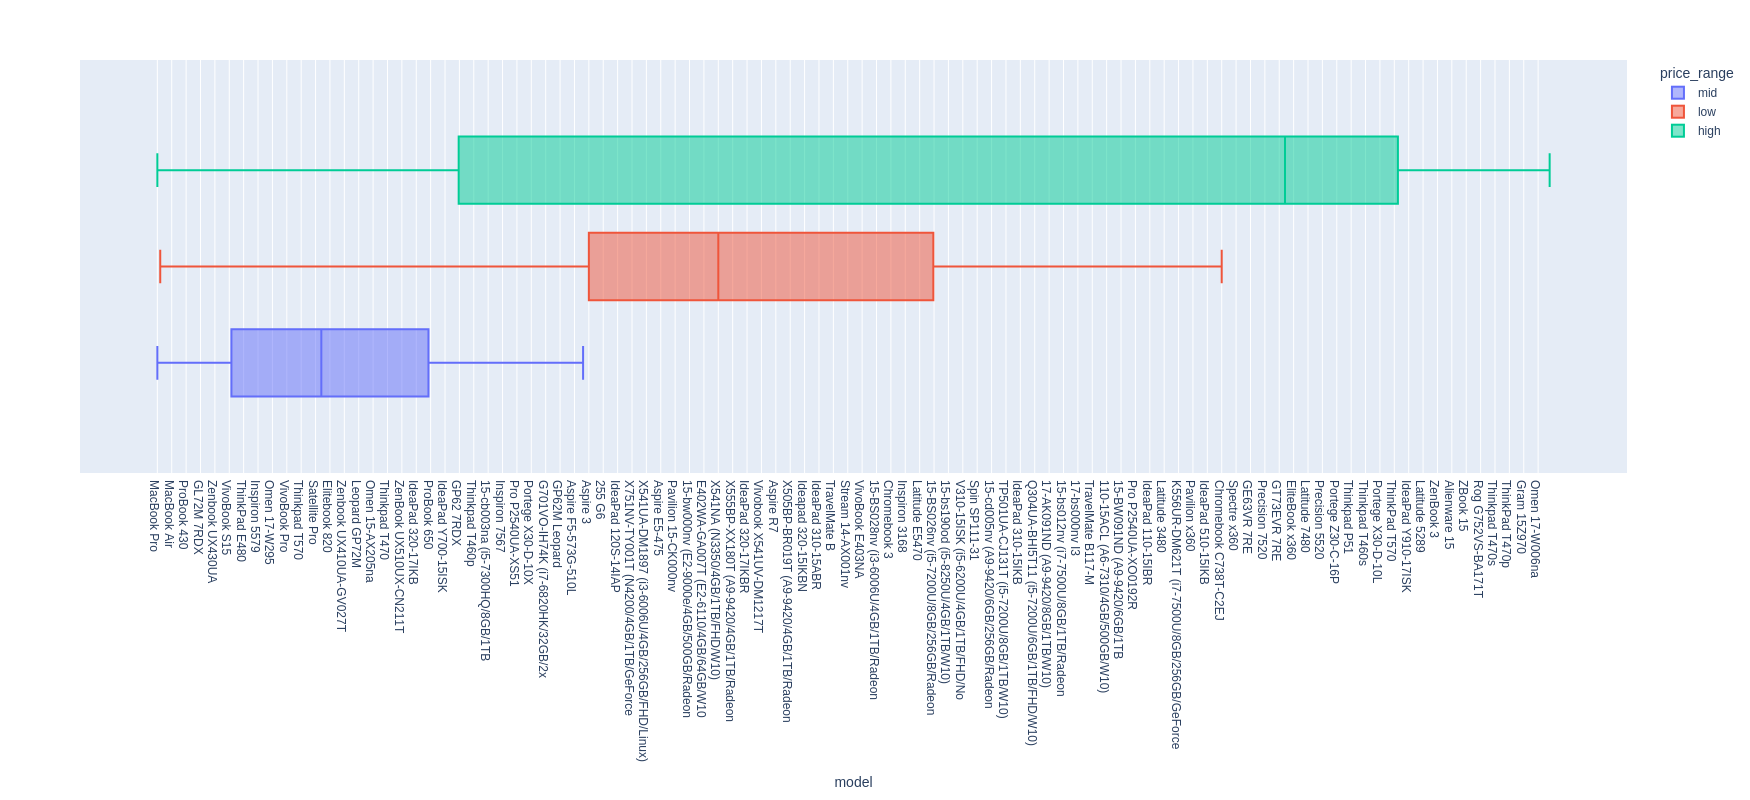

In [25]:
px.box(laptops_train,x="model", color="price_range", height=800)

### Category

In [26]:
px.histogram(laptops_train, x="category", color="price_range")

### Screen size

In [27]:
px.histogram(laptops_train, x="screen_size", color="price_range").update_xaxes(categoryorder="category ascending")

### Resolution

In [28]:
px.histogram(laptops_train, x="resolution", color="price_range", height=600)

### CPU

In [29]:
px.histogram(laptops_train, x="cpu", color="price_range", height=700)

### RAM

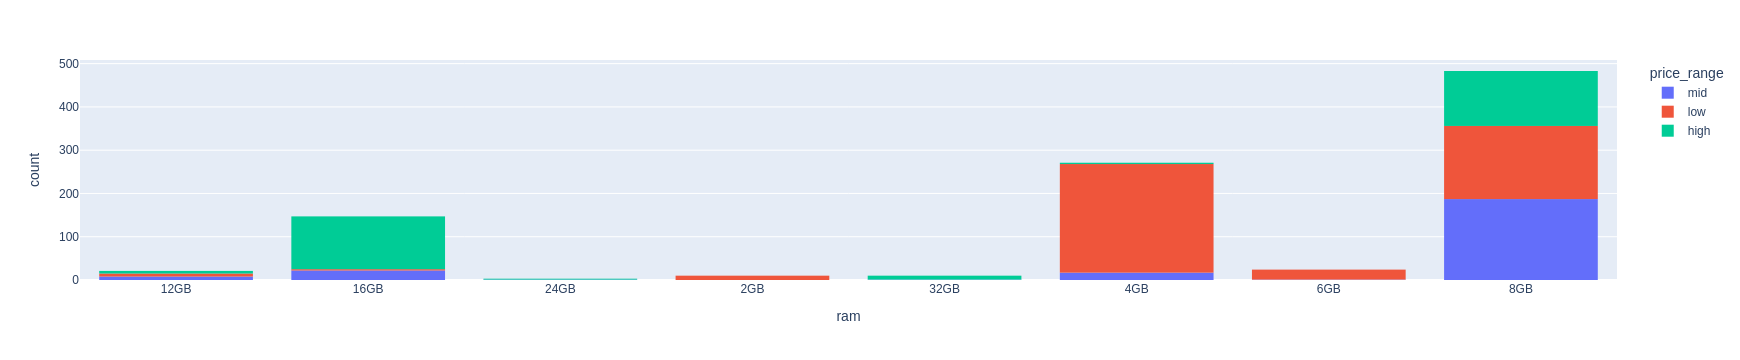

In [30]:
px.histogram(laptops_train, x="ram", color="price_range").update_xaxes(type="category",categoryorder="category ascending")
#no funciona el categoryorder anda a sabe pq

### Storage

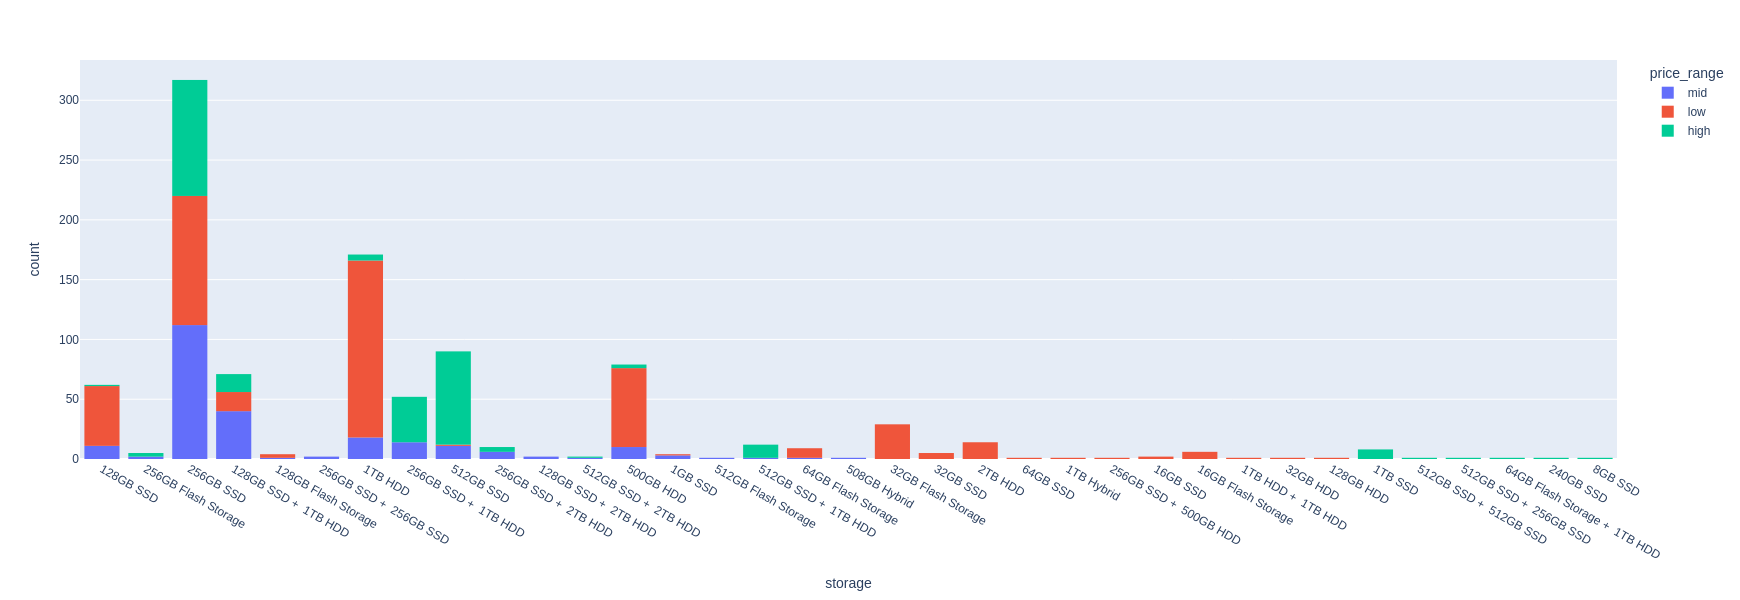

In [31]:
px.histogram(laptops_train, x="storage", color="price_range", height=600)

### GPU

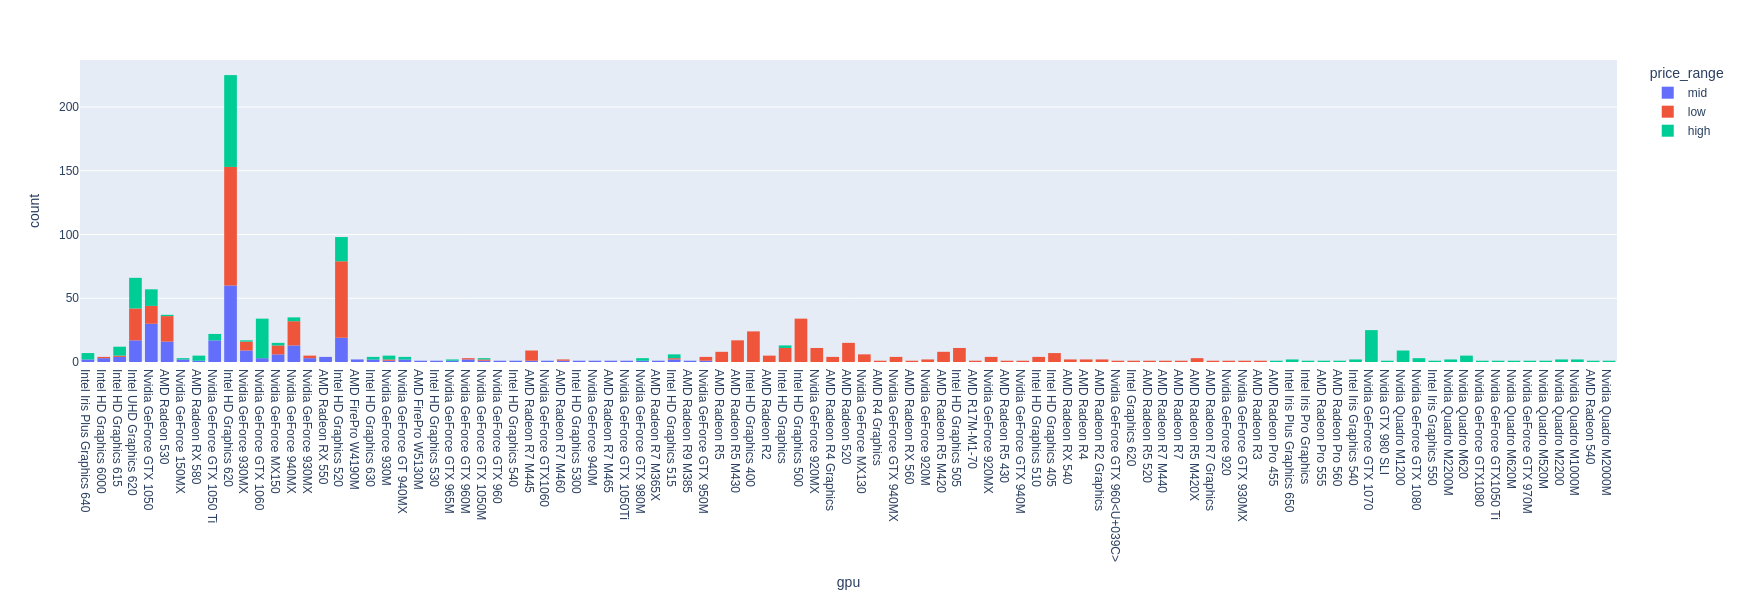

In [32]:
px.histogram(laptops_train, x="gpu", color="price_range", height=600)

### OS

In [33]:
px.histogram(laptops_train, x="os", color="price_range")

### Weight

In [34]:
px.histogram(laptops_train, x="weight", color="price_range").update_xaxes(categoryorder="category ascending")

## Listado de dudas/preguntas para el proveedor del dataset

* De que fuentes provienen estos precios? y que metodos fueron utilizados para recolectarlos?
* Porque la columna de SO Type tiene tantos valores nulos?
* Pensas que el tipo de SO afecta al precio?
* Pensas que existen otros factores que afecten el precio de una laptop? como serían el material de chasis, distribución de teclado, etc.
* Cual crees que es la variable que mas afecta al precio de una laptop?
* Omitiste alguna variable al creear el dataset?